# ML Foreclosure Binary Classification - ALL data

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 06 = Repurchased
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale
        * 16 = Reperforming Loan Sale

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *


# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [42]:
df=pd.read_csv("D:\FM_Acq_Perf_FMAC_ML.csv")
df.head()

,Unnamed: 0,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,rptPeriod,currIntRate,currUPB,loanAge,monMatur,mSA,zeroBalCode,zeroBalDate,lastPdInstDate,forecloDate,dispDate,forecloCost,propRepCost,recovCosts,miscCost,holdTaxCost,saleProceed,credEnhProceed,repurchProceed,otherForecloProceed,nonIntUPB,prinForgivBal,repurchMakeWholeProceedFlg,forecloPrinWriteOffAmnt,servActivIndicator,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,0,100094030068,3,7.75,152000,1999-11-01,2000-01-01,85.0,1.0,41.0,604.0,2,891,25.0,1.0,604.0,604.0,604.0,15,34,2003-08-01,7.75,145501.53,44,316.0,29820,1.0,2003-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,42,1,1.0,7.84,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
1,1,100118647578,2,7.75,106000,1999-11-01,2000-01-01,80.0,2.0,27.0,652.0,2,972,0.0,0.0,696.0,652.0,674.0,44,38,2004-09-01,7.75,100275.11,57,303.0,38900,1.0,2004-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,35,21,2.0,7.84,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
2,2,100687390672,1,8.00,120000,1999-11-01,2000-01-01,77.0,1.0,54.0,664.0,1,809,0.0,0.0,664.0,664.0,664.0,26,5,2000-12-01,8.00,119591.99,12,348.0,17820,9.0,2000-12-01,2000-05-01,2000-12-01,2001-06-01,2289.54,2670.18,NaN,775.0,543.48,153215.42,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5,6,6.0,7.84,7.67,7.7375,0.022164,6.06,0.16,-0.33,0.2625,0.020408,-0.043025,0.033926
3,3,102134561765,2,8.50,206000,1999-11-01,2000-01-01,80.0,1.0,35.0,710.0,2,190,0.0,0.0,710.0,710.0,710.0,44,39,2003-05-01,8.50,197460.89,41,319.0,37980,1.0,2003-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,35,5,2.0,7.84,7.67,7.7375,0.022164,6.06,0.66,-0.83,0.7625,0.084184,-0.108214,0.098546
4,4,102389202525,1,7.75,140000,1999-11-01,2000-01-01,78.0,2.0,49.0,584.0,2,992,0.0,0.0,706.0,584.0,645.0,15,50,2006-05-01,7.75,129820.44,77,283.0,44060,1.0,2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,62,14,1.0,7.84,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616


In [43]:
#df.info()

## Remove columns not involved in 'Foreclosure or Not' query

In [44]:
df.drop(['Unnamed: 0','id','deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 30 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origDate              1300554 non-null object
origLTV               1300554 non-null float64
numBorrowers          1300554 non-null float64
origDebtIncRatio      1300554 non-null float64
borrCreditScore       1300554 non-null float64
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null float64
bestCreditScore       1300554 non-null float64
worstCreditScore      1300554 non-null float64
avgCreditScore        1300554 non-null float64
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null float64
fmacRateM

## Engineer originDate into Date features

In [46]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [47]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [48]:
df.drop(['origDate'],1,inplace=True)

In [49]:
df[['origYear','origMonth']].tail()

,origYear,origMonth
1300549,2019,3
1300550,2019,3
1300551,2019,3
1300552,2019,3
1300553,2019,3


In [50]:
notSuccess_df = df[~(df['zeroBalCode'] == 1)]

In [51]:
notSuccess_df.shape

(285695, 31)

In [52]:
notSuccess_corr = notSuccess_df.corr()

Text(0.5, 1, 'Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

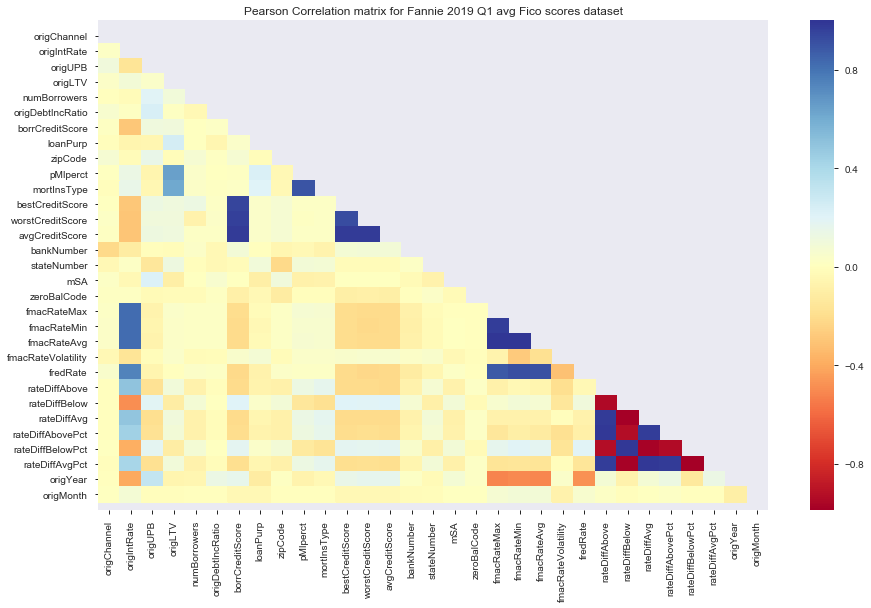

In [53]:
# Plot the Pearson Correlation reduced matrix
matrix = np.triu(notSuccess_corr)
fig, ax = plt.subplots(figsize=(15,9)) 
ax = sns.heatmap(notSuccess_corr,   mask = matrix, cmap = 'RdYlBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

In [55]:
df.shape

(1300554, 31)

In [56]:
corr = df.corr()

Text(0.5, 1, 'Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

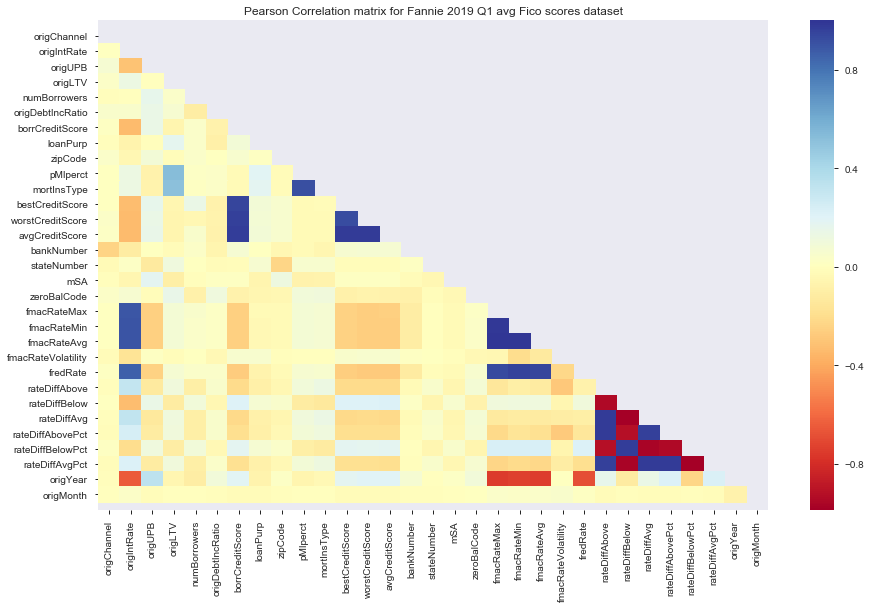

In [57]:
# Plot the Pearson Correlation reduced matrix
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(15,9)) 
ax = sns.heatmap(corr,   mask = matrix, cmap = 'RdYlBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

In [58]:
corr.to_csv('eda/FM_Acq_Perf_FMAC_ML_corr.csv')

# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [59]:
df.zeroBalCode.value_counts()

1.0     1014859
9.0      173305
3.0       38358
16.0      27689
2.0       18973
15.0      13843
6.0       13527
Name: zeroBalCode, dtype: int64

In [60]:
df.zeroBalCode.unique()

array([ 1.,  9.,  6.,  2.,  3., 16., 15.])

In [61]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [62]:
df.zeroBalCode.unique()

array([0., 1.])

# Run the Pearson's again on the "0" "1" classification

In [63]:
zeroOnecorr = df.corr()

Text(0.5, 1, 'Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

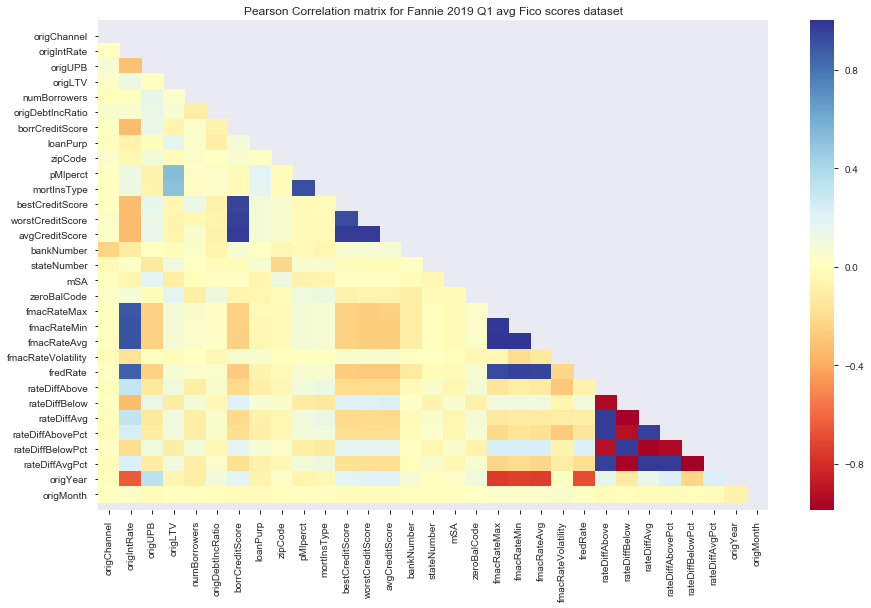

In [65]:
# Plot the Pearson Correlation reduced matrix
matrix = np.triu(zeroOnecorr)
fig, ax = plt.subplots(figsize=(15,9)) 
ax = sns.heatmap(zeroOnecorr,   mask = matrix, cmap = 'RdYlBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

In [66]:
zeroOnecorr.to_csv('eda/FM_Acq_Perf_FMAC_ML_zeroOnecorr.csv')

In [14]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 31 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origLTV               1300554 non-null float64
numBorrowers          1300554 non-null float64
origDebtIncRatio      1300554 non-null float64
borrCreditScore       1300554 non-null float64
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null float64
bestCreditScore       1300554 non-null float64
worstCreditScore      1300554 non-null float64
avgCreditScore        1300554 non-null float64
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null float64
fmacRateMax           1300554 non-null float64
fmacRate

# Review values for dates and slice (if needed) the timeframe you want

In [15]:
df.origYear.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [16]:
sorted(df['origMonth'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Coerce the column dtype (int in this case)

In [17]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 31 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origLTV               1300554 non-null int32
numBorrowers          1300554 non-null int32
origDebtIncRatio      1300554 non-null int32
borrCreditScore       1300554 non-null int32
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null int32
bestCreditScore       1300554 non-null int32
worstCreditScore      1300554 non-null int32
avgCreditScore        1300554 non-null int32
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null int32
fmacRateMax           1300554 non-null float64
fmacRateMin           1300

<a id='MLReady'></a>

<a id='MLReady'></a>
## *MLReady.csv file loading point
uncomment one of the boxes below

In [19]:
#df.to_csv('D:\FM_FULL_EPOCH3_MLReady.csv')

In [20]:
#df = pd.read_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

## Separate out ~20% as "Test data"

In [21]:
df.shape

(1300554, 31)

In [22]:
test_df = df[df['origYear'] > 2013]

In [23]:
test_df.shape

(33785, 31)

In [24]:
good = test_df.zeroBalCode.value_counts()[0]
bad = test_df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{test_df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

0    31950
1     1835
Name: zeroBalCode, dtype: int64
We have 5.43% Foreclosures in our dataset


In [25]:
test_df.to_csv('D:\FM_TEST_13-19.csv')

In [26]:
df = df[df['origYear'] <= 2013]

In [27]:
df.shape

(1266769, 31)

In [28]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

0    982909
1    283860
Name: zeroBalCode, dtype: int64
We have 22.41% Foreclosures in our dataset


## Split remaining Training data into 'Forclo' & 'Success'
Then we will constructed a random selection from each for the same number of rows to create a 50/50 class split

### Create 'Foreclosure only' slice df

In [29]:
forclo_df = df[df['zeroBalCode'] == 1]

In [30]:
forclo_df.shape

(283860, 31)

In [31]:
forclo_df.to_csv('D:\FM_FULL_FORECLO_ONLY.csv')

### Create 'Succes only' slice df

In [32]:
success_df = df[df['zeroBalCode'] == 0]

In [33]:
success_df.shape

(982909, 31)

In [34]:
success_df.to_csv('D:\FM_FULL_SUCCESS_ONLY.csv')

### Randomly Sample each df separately then combine

In [42]:
successSample50_df = success_df.sample(n = 50000, random_state = 9)

In [43]:
forcloSample50_df = forclo_df.sample(n = 50000, random_state = 9)

In [44]:
df = pd.concat([forcloSample50_df,successSample50_df])

In [45]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

1    50000
0    50000
Name: zeroBalCode, dtype: int64
We have 50.0% Foreclosures in our dataset


In [46]:
# from sklearn.model_selection import train_test_split

# training_features, test_features, \
# training_target, test_target, = train_test_split(
#     df.drop(['zeroBalCode'], axis=1)
#     , df['zeroBalCode']
#     , test_size = .1
#     , random_state=12
# )

In [47]:
# # Further split the training data into training/test
# x_train, x_val, y_train, y_val = train_test_split(
#     training_features
#     , training_target
#     , test_size = .1
#     ,random_state=12
# )

In [48]:
# # For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [49]:
# print('#############################################')
# print('Before oversampling: "Closed" crushes "Default" and causes issues:')
# print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [50]:
# y_train_res.shape

In [51]:
# df = x_train_res.copy()

In [52]:
# df['zeroBalCode'] = y_train_res

In [ ]:
# df.shape

# Review metrics last time before run (to have record of starting values)

In [53]:
pd.set_option('max_columns',None)
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
117061,2,7.375,95000,86,1,29,672,2,477,17.0,1,672,672,672,26,16,21780,1,7.24,7.11,7.1600,0.018284,5.39,0.135,-0.265,0.2150,0.018646,-0.037271,0.030028,2001,6
782997,2,5.625,352000,70,1,64,733,1,945,0.0,0,733,733,733,4,4,41860,1,5.77,5.62,5.6950,0.026690,4.06,-0.145,-0.005,-0.0700,-0.025130,-0.000890,-0.012291,2005,7
1014775,1,6.750,86000,66,1,56,669,1,871,0.0,0,669,669,669,12,33,10740,1,6.68,6.45,6.5720,0.035659,4.76,0.070,-0.300,0.1780,0.010479,-0.046512,0.027085,2007,8
862787,3,6.375,216000,80,1,42,670,1,501,0.0,0,670,670,670,80,13,19780,1,6.58,6.43,6.5075,0.023328,4.86,-0.205,0.055,-0.1325,-0.031155,0.008554,-0.020361,2006,4
867751,3,6.250,390000,70,2,27,703,1,108,0.0,0,722,703,712,15,35,35620,1,6.62,6.58,6.5975,0.006079,5.14,-0.370,0.330,-0.3475,-0.055891,0.050152,-0.052671,2006,5


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 117061 to 290659
Data columns (total 31 columns):
origChannel           100000 non-null int64
origIntRate           100000 non-null float64
origUPB               100000 non-null int64
origLTV               100000 non-null int32
numBorrowers          100000 non-null int32
origDebtIncRatio      100000 non-null int32
borrCreditScore       100000 non-null int32
loanPurp              100000 non-null int64
zipCode               100000 non-null int64
pMIperct              100000 non-null float64
mortInsType           100000 non-null int32
bestCreditScore       100000 non-null int32
worstCreditScore      100000 non-null int32
avgCreditScore        100000 non-null int32
bankNumber            100000 non-null int64
stateNumber           100000 non-null int64
mSA                   100000 non-null int64
zeroBalCode           100000 non-null int32
fmacRateMax           100000 non-null float64
fmacRateMin           100000 non-null floa

# Pycaret - Setup with categorical definition

### Use complex setup 

In [56]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , pca = False 
    , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value.
    , normalize = True
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
    , bin_numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'bestCreditScore'
            , 'avgCreditScore'
            , 'worstCreditScore'
        ] # Set to True to bin numerics using K Means
    , feature_selection = True
    , silent = True
    , profile = False
    , categorical_features = [
            'origChannel'
            , 'numBorrowers'
            , 'loanPurp'
            , 'zipCode'
            , 'bankNumber'
            , 'stateNumber'
            , 'origYear'
            , 'origMonth'
            , 'mSA'
        ]
        , numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'pMIperct'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
            , 'bestCreditScore'
            , 'avgCreditScore'
            , 'rateDiffAbove'
            , 'rateDiffBelow'
            , 'rateDiffAvg'
            , 'rateDiffAbovePct'
            , 'rateDiffBelowPct'
            , 'rateDiffAvgPct'
        ]
)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,2830
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(100000, 31)"
4,Missing Values,False
5,Numeric Features,21
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with no blacklist exclusions

In [57]:
model_results=compare_models() #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7331,0.8063,0.7593,0.7234,0.7409,0.4661
1,Light Gradient Boosting Machine,0.7323,0.8057,0.7641,0.7202,0.7415,0.4645
2,Logistic Regression,0.7274,0.7983,0.7482,0.7203,0.7339,0.4548
3,Ridge Classifier,0.7264,0,0.7505,0.7179,0.7338,0.4527
4,Linear Discriminant Analysis,0.726,0.7957,0.7499,0.7175,0.7333,0.4518
5,SVM - Linear Kernel,0.7248,0,0.7442,0.719,0.7308,0.4495
6,Extra Trees Classifier,0.7209,0.79,0.7372,0.7158,0.7263,0.4416
7,Ada Boost Classifier,0.7191,0.7872,0.7341,0.7147,0.7242,0.4382
8,Gradient Boosting Classifier,0.7191,0.7892,0.7289,0.7169,0.7228,0.4382
9,Extreme Gradient Boosting,0.7183,0.7884,0.7296,0.7154,0.7224,0.4365


## Create models 

#### CatBoost

In [106]:
catboost =create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7320,0.8017,0.7673,0.7184,0.7420,0.4637
1,0.7395,0.8165,0.7733,0.7260,0.7489,0.4788
2,0.7250,0.8029,0.7531,0.7148,0.7335,0.4498
3,0.7239,0.7937,0.7576,0.7115,0.7338,0.4476
4,0.7256,0.8032,0.7449,0.7190,0.7317,0.4510
5,0.7267,0.8009,0.7456,0.7203,0.7327,0.4533
6,0.7442,0.8143,0.7695,0.7341,0.7514,0.4882
7,0.7417,0.8127,0.7703,0.7304,0.7498,0.4833
8,0.7397,0.8131,0.7632,0.7307,0.7466,0.4792
9,0.7332,0.8039,0.7482,0.7283,0.7381,0.4664


#### Light Gradient Boosting Machine (lgbm)

In [62]:
lightgbm = create_model('lightgbm', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7310,0.7991,0.7748,0.7141,0.7432,0.4618
1,0.7383,0.8156,0.7748,0.7239,0.7485,0.4765
2,0.7274,0.8041,0.7628,0.7142,0.7377,0.4547
3,0.7199,0.7944,0.7520,0.7085,0.7296,0.4397
4,0.7303,0.8025,0.7572,0.7203,0.7383,0.4604
5,0.7265,0.8013,0.7493,0.7184,0.7336,0.4529
6,0.7419,0.8120,0.7725,0.7297,0.7505,0.4837
7,0.7425,0.8127,0.7815,0.7266,0.7531,0.4848
8,0.7382,0.8127,0.7710,0.7252,0.7474,0.4761
9,0.7274,0.8021,0.7452,0.7215,0.7332,0.4547


#### Extra Trees Classifier

In [58]:
et = create_model('et', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7182,0.7850,0.7471,0.7082,0.7271,0.4363
1,0.7276,0.7983,0.7467,0.7211,0.7337,0.4552
2,0.7162,0.7878,0.7441,0.7066,0.7249,0.4322
3,0.7133,0.7789,0.7333,0.7071,0.7199,0.4266
4,0.7180,0.7886,0.7314,0.7143,0.7227,0.4360
5,0.7179,0.7894,0.7232,0.7175,0.7203,0.4357
6,0.7233,0.7930,0.7377,0.7189,0.7282,0.4465
7,0.7303,0.7955,0.7434,0.7262,0.7347,0.4605
8,0.7244,0.7950,0.7351,0.7216,0.7283,0.4488
9,0.7193,0.7881,0.7303,0.7166,0.7234,0.4385


# Tune Models, Calibrate and Finalize

### Tuned Light GBM

In [107]:
tuned_lightgbm = tune_model('lightgbm') # fold=10

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7331,0.8006,0.7699,0.7188,0.7435,0.4660
1,0.7306,0.8141,0.7662,0.7171,0.7408,0.4611
2,0.7282,0.8047,0.7594,0.7166,0.7374,0.4562
3,0.7205,0.7940,0.7508,0.7097,0.7297,0.4408
4,0.7305,0.8013,0.7550,0.7215,0.7378,0.4608
5,0.7280,0.7995,0.7478,0.7211,0.7343,0.4559
6,0.7389,0.8122,0.7673,0.7278,0.7470,0.4777
7,0.7395,0.8108,0.7737,0.7259,0.7490,0.4788
8,0.7333,0.8091,0.7613,0.7227,0.7415,0.4664
9,0.7293,0.8045,0.7445,0.7244,0.7343,0.4585


### LigthGBM had declines on all metrics!!
#### Improved:  
#### Declined: Accuracy AUC   Recall    Precision F1   Kappa
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.7323	0.8057	0.7641	0.7202	0.7415	0.4645
    Tuned:    Mean	0.7312	0.8051	0.7596	0.7206	0.7395	0.4622
    
So we will keep light_gbm moving forward

#### Examine Thresholds "punishing false negatives"

In [119]:
optimize_threshold(lightgbm, true_negative = 1000, false_negative = -5000)

Optimized Probability Threshold: 0.16 | Optimized Cost Function: 1761000


#### Calibrate Light GBM

In [121]:
calibrated_lgbm = calibrate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7286,0.7999,0.7632,0.7155,0.7386,0.4570
1,0.7365,0.8172,0.7666,0.7248,0.7451,0.4728
2,0.7293,0.8058,0.7587,0.7184,0.7380,0.4585
3,0.7235,0.7948,0.7512,0.7136,0.7319,0.4468
4,0.7335,0.8039,0.7542,0.7260,0.7398,0.4668
5,0.7295,0.8011,0.7456,0.7242,0.7347,0.4589
6,0.7406,0.8126,0.7624,0.7323,0.7471,0.4811
7,0.7430,0.8136,0.7707,0.7321,0.7509,0.4859
8,0.7404,0.8129,0.7658,0.7305,0.7478,0.4807
9,0.7291,0.8033,0.7404,0.7260,0.7331,0.4581


### LigthGBM Calibration had mixed result
#### Improved:  Accuracy AUC Precision Kappa
#### Declined:     Recall     F1   
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    UnCalibrated:  Mean	0.7323	0.8057	0.7641	0.7202	0.7415	0.4645
    Calibrated:    Mean	0.7334	0.8065	0.7579	0.7243	0.7407	0.4667
    
We will use calibrated_lgbm to finalize the model

In [122]:
final_lgbm = finalize_model(calibrated_lgbm)

## Tuned CatBoost

In [108]:
tuned_catboost = tune_model('catboost') # from fold=50

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7306,0.7992,0.7613,0.7191,0.7396,0.4611
1,0.7400,0.8152,0.7707,0.7279,0.7487,0.4799
2,0.7318,0.8039,0.7505,0.7252,0.7376,0.4634
3,0.7195,0.7929,0.7486,0.7093,0.7284,0.4389
4,0.7267,0.8011,0.7419,0.7219,0.7317,0.4533
5,0.7252,0.8003,0.7389,0.7211,0.7299,0.4503
6,0.7430,0.8116,0.7628,0.7356,0.7489,0.4860
7,0.7459,0.8101,0.7692,0.7367,0.7526,0.4916
8,0.7359,0.8111,0.7553,0.7289,0.7419,0.4717
9,0.7332,0.8031,0.7441,0.7302,0.7371,0.4664


### CatBoost had declines on all metrics!!
#### Improved:  
#### Declined:   Accuracy AUC   Recall    Precision F1   Kappa  
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.7693	0.8472	0.8259	0.7417	0.7815	0.5386
    Tuned:    Mean	0.7332	0.8048	0.7543	0.7256	0.7396	0.4663
    
Use catboost moving forward

#### Examine Thresholds "punishing false negatives"

In [123]:
optimize_threshold(catboost, true_negative = 1000, false_negative = -5000)

Optimized Probability Threshold: 0.19 | Optimized Cost Function: 1928000


In [125]:
final_catboost = finalize_model(catboost)

# Evaluate Models

## Light GBM ("Fast Set" - some plots take longer and they are commented out

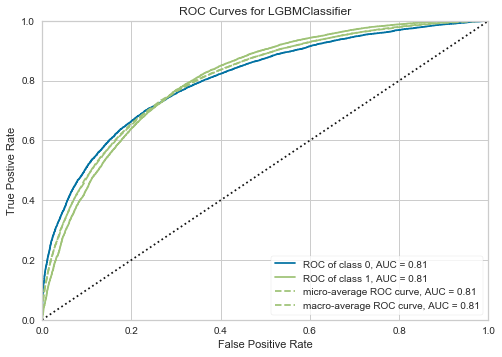

In [86]:
plot_model(tuned_lightgbm) #Super Fast

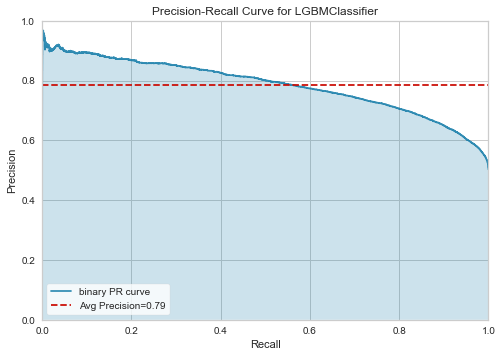

In [88]:
plot_model(tuned_lightgbm, plot = 'pr')  #Super Fast

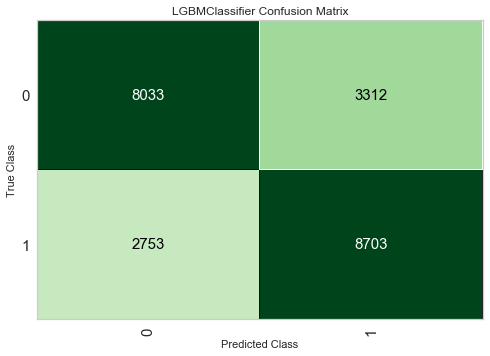

In [89]:
plot_model(tuned_lightgbm, plot='confusion_matrix') #Super Fast

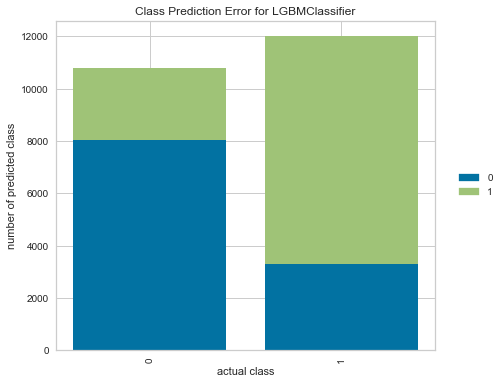

In [90]:
plot_model(tuned_lightgbm, plot = 'error') #Super Fast

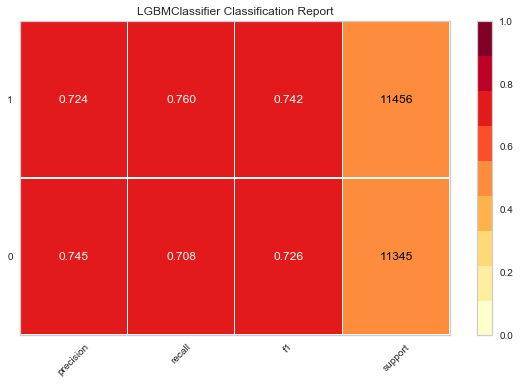

In [91]:
plot_model(tuned_lightgbm, plot = 'class_report') #Super Fast

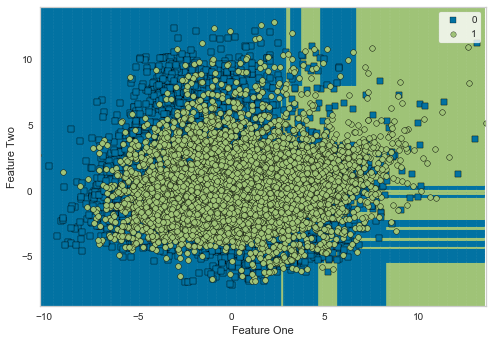

In [92]:
plot_model(tuned_lightgbm, plot = 'boundary') #Super Fast

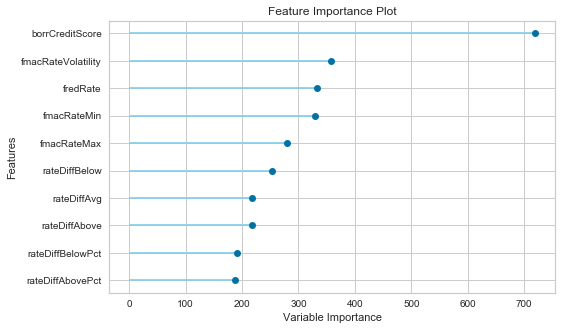

In [97]:
plot_model(tuned_lightgbm, plot = 'feature') #Super Fast

In [98]:
plot_model(tuned_lightgbm, plot = 'parameter') #Super Fast

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,80
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.2
n_estimators,100


## Extra Trees Classifier ("Fast Set" - some plots take longer and they are commented out

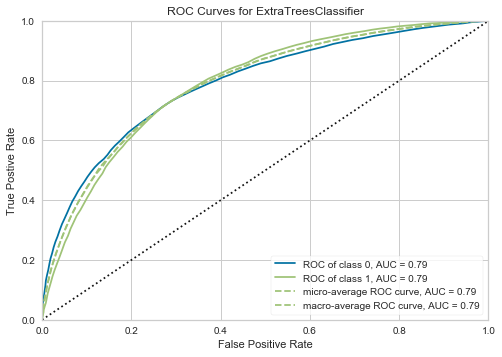

In [73]:
plot_model(et) #Super Fast

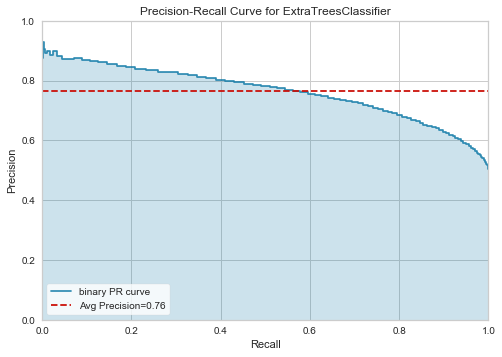

In [75]:
plot_model(et, plot = 'pr')  #Super Fast

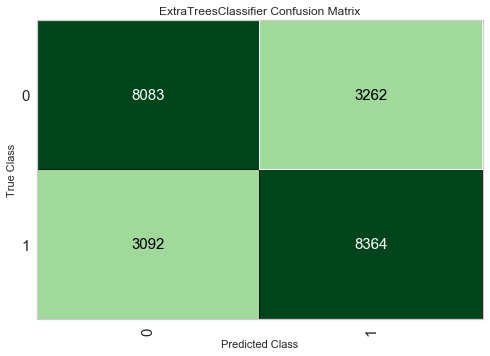

In [76]:
plot_model(et, plot='confusion_matrix') #Super Fast

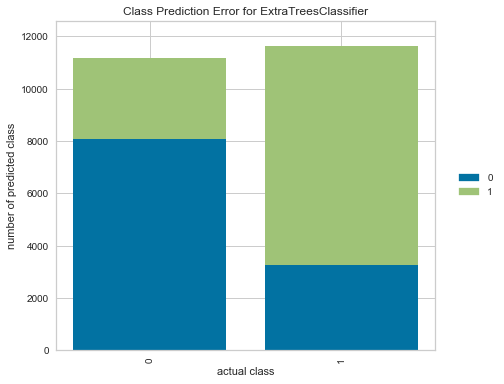

In [77]:
plot_model(et, plot = 'error') #Super Fast

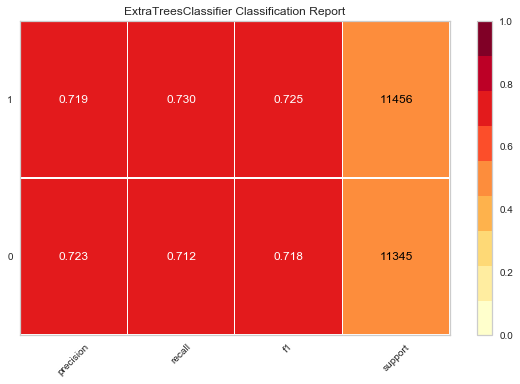

In [78]:
plot_model(et, plot = 'class_report') #Super Fast

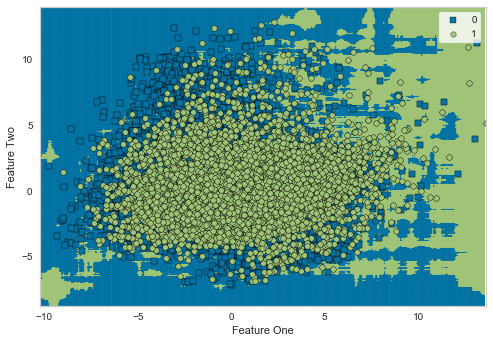

In [79]:
plot_model(et, plot = 'boundary') #Super Fast

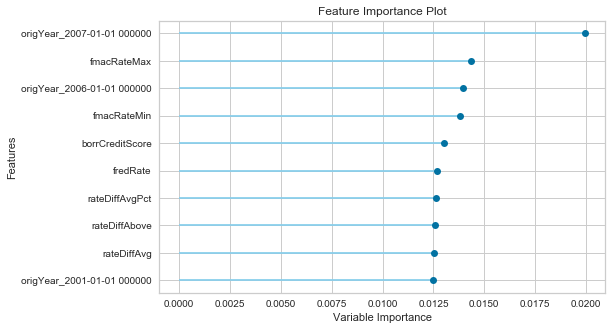

In [84]:
plot_model(et, plot = 'feature') #Super Fast

In [85]:
plot_model(et, plot = 'parameter') #Super Fast

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


# Interpret Models

## Catboost (can't use plot_model for Catboost so we use interpret_model

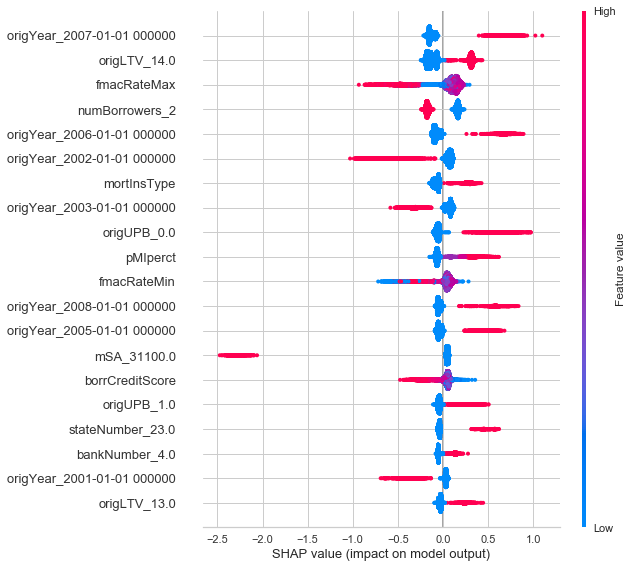

In [110]:
interpret_model(catboost, plot = 'summary')

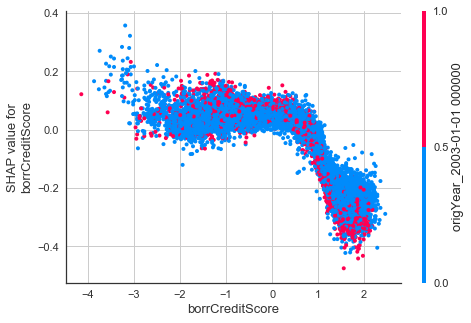

In [111]:
interpret_model(catboost, plot='correlation', feature='borrCreditScore')

# Predict models using the "Oversampled" test holdout within PyCaret

Can't use the final_model output here since it includes the "Train hold out data" 

#### CatBoost

In [113]:
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7321,0.8082,0.7551,0.7237,0.7391,0.4641


#### Tuned CatBoost

In [114]:
pred_holdout_tuned = predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7331,0.8069,0.7507,0.727,0.7386,0.4661


#### Light GBM

In [115]:
pred_holdout = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.7337,0.8071,0.7614,0.7231,0.7418,0.4672


#### Tuned Light GBM

In [116]:
pred_holdout_tuned = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.734,0.8066,0.7597,0.7243,0.7416,0.4679


#### Extra Trees Classifier

In [102]:
pred_holdout = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.7213,0.7897,0.7301,0.7194,0.7247,0.4426


# The golden moment... put 10% sample test data through the models...

# Use test_df (2013-2019) created at first train/test/split
 This "test" set was split BEFORE Constructed Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will use this test_df in our models to see how well they perform

In [126]:
test_df.shape

(33785, 31)

In [127]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    31950
1     1835
Name: zeroBalCode, dtype: int64
Positive samples are 5.43%


### Make function to easily create Confusion Matrix information scoring

In [132]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalseNegative'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalsePositive'
    else:
        value = 'Undefined'
    return value

# Catboost using "Test" data to do final evaluation

In [128]:
predictions = predict_model(final_catboost, data=test_df)

In [129]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,1,0.5118
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3678
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.4198
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.2495
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.4296


In [130]:
results = predictions[['zeroBalCode','Label','Score']]

In [131]:
predictions.Label.value_counts()

0    31918
1     1867
Name: Label, dtype: int64

In [133]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [134]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [137]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}    #     {confusionMatrix["FalsePositive"]}     #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
      # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    30528    #     1390     #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    1422     #     445      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  95.55%
              FalseNegative:  4.45%
              TruePosiive:   24.25%
              FalsePositive: 75.75%


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [ ]:
#save_model(final_catboost, 'catboost_Construct50k_052520')

# Light Gradient Boosting Machine

In [138]:
predictions = predict_model(final_lgbm, data=test_df)

In [139]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,1,0.5270
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3252
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3189
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.2133
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.3797


In [140]:
results = predictions[['zeroBalCode','Label','Score']]

In [141]:
predictions.Label.value_counts()

0    32063
1     1722
Name: Label, dtype: int64

In [142]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [143]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [144]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}     #     {confusionMatrix["FalsePositive"]}      #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
# 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    30642     #     1421      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    1308     #     414      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  95.91%
              FalseNegative:  4.09%
              TruePosiive:   22.56%
              FalsePositive: 77.44%


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [ ]:
#save_model(final_lgbm, 'lgbm_Construct50k_052520')

# Extra Trees Classifier

In [145]:
predictions = predict_model(et, data=test_df)

In [146]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,1,0.53
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.39
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.48
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.24
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,1,0.55


In [147]:
results = predictions[['zeroBalCode','Label','Score']]

In [148]:
predictions.Label.value_counts()

0    31452
1     2333
Name: Label, dtype: int64

In [150]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [151]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [155]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}    #     {confusionMatrix["FalsePositive"]}     #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
      # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    29984    #     1468     #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    1966     #     367      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  93.85%
              FalseNegative:  6.15%
              TruePosiive:   20.0%
              FalsePositive: 80.0%


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [156]:
#save_model(et, 'et_Constructed50k_052520')